In [1]:
'''
1.Write an LSTM program to predict next alphabet in the sequence “A B C D E F G H I J K L M N O P
Q R S T U V W X Y Z”
'''

#import libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from sklearn.preprocessing import LabelEncoder


In [2]:
alphabet_sequence = "A B C D E F G H I J K L M N O P Q R S T U V W X Y Z".split()


In [4]:
# Label encoding the alphabets
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(alphabet_sequence)


In [5]:
# Prepare the data for the LSTM model
x = []
y = []
for i in range(len(integer_encoded)-1):
    x.append(integer_encoded[i])
    y.append(integer_encoded[i+1])
x = np.array(x)
y = np.array(y)
# Reshape the data to fit the LSTM input requirements
x = x.reshape((x.shape[0], 1, 1))

In [6]:
# One-hot encode the output labels
y = tf.keras.utils.to_categorical(y, num_classes = len(alphabet_sequence))

In [8]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(len(alphabet_sequence), activation = 'softmax'))
# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Train the model
model.fit(x, y, epochs = 100, verbose = 0)


In [9]:
# Function to predict the next character
def predict_next_character(char):
    encoded_char = label_encoder.transform([char])
    encoded_char = encoded_char.reshape((1, 1, 1))
    predicted_index = np.argmax(model.predict(encoded_char, verbose = 0))
    predicted_char = label_encoder.inverse_transform([predicted_index])
    return predicted_char[0]
    

In [14]:
#test the model
test_char = 'M'
predicted_char = predict_next_character(test_char)
print(f'The next character after "{test_char}" is "{predicted_char}".')

The next character after "M" is "N".


In [19]:
'''
2.Build a LSTM to predict the stock price for multivariate data(use multiple features).Use any online website or tiingo to get the dataset.
'''

#import libraries
import pandas as pd
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [20]:
data = pd.read_csv('Netflix Dataset.csv')


In [21]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5540 entries, 0 to 5539
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5540 non-null   object 
 1   Open       5540 non-null   float64
 2   High       5540 non-null   float64
 3   Low        5540 non-null   float64
 4   Close      5540 non-null   float64
 5   Adj Close  5540 non-null   float64
 6   Volume     5540 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 303.1+ KB


In [22]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])


In [23]:
# Sort the data by date
data.sort_values('Date', inplace = True)

In [29]:
# Select features and target
features = data[['Open','High','Low','Volume', 'Adj Close']]
target = data['Close'].values.reshape(-1, 1)

In [31]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target)


In [32]:
# Prepare the data for LSTM
x = []
y = []
lookback = 60
for i in range(lookback, len(scaled_features)):
    x.append(scaled_features[i-lookback:i])
    y.append(scaled_target[i])

x, y = np.array(x), np.array(y)


In [33]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = False)

In [38]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,  return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(units = 25))
model.add(Dense(units = 1))
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Train the model
model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_data = (x_test, y_test), verbose = 1)

Epoch 1/10
137/137 [==============================] - 10s 41ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 2/10
137/137 [==============================] - 5s 34ms/step - loss: 4.8826e-04 - val_loss: 0.0018
Epoch 3/10
137/137 [==============================] - 4s 32ms/step - loss: 3.7697e-04 - val_loss: 0.0020
Epoch 4/10
137/137 [==============================] - 4s 33ms/step - loss: 3.4650e-04 - val_loss: 0.0016
Epoch 5/10
137/137 [==============================] - 4s 32ms/step - loss: 3.0966e-04 - val_loss: 0.0014
Epoch 6/10
137/137 [==============================] - 5s 35ms/step - loss: 3.3677e-04 - val_loss: 0.0025
Epoch 7/10
137/137 [==============================] - 4s 31ms/step - loss: 3.0077e-04 - val_loss: 0.0016
Epoch 8/10
137/137 [==============================] - 4s 33ms/step - loss: 3.5725e-04 - val_loss: 0.0013
Epoch 9/10
137/137 [==============================] - 4s 32ms/step - loss: 3.0964e-04 - val_loss: 0.0024
Epoch 10/10
137/137 [==============================] - 4s 

In [39]:
predict_stock_price = model.predict(x_test)

35/35 [==============================] - 1s 12ms/step


In [41]:
# Inverse transform the scaled predictions and target values to get actual values
predicted_stock_price = scaler.inverse_transform(predict_stock_price)
y_test_actual = scaler.inverse_transform(y_test)


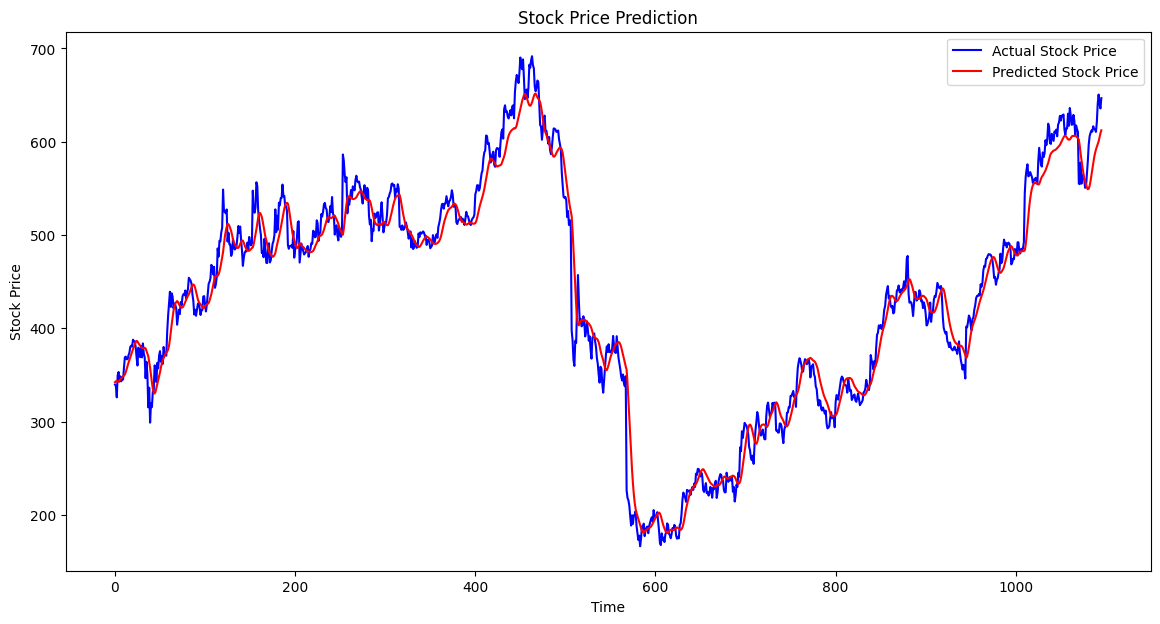

In [42]:
# Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()